# Security Analysis Part IV - The Dividend Factor
# Chapter 28 - Newer Canons of Common-Stock investment
Splitting hairs between *investment* and *speculation* the chapter brings up two main questions regarding dividends relating to "The Dividend Factor"
* Does the issue have 'average' prospects for the future (e.g. nothing out of the ordinary or what the broader market might look at as 'unusually good prospects for growth')
* Does the issue sell for considerably less than the business would be to a private owner? 

I in particular find the second point fascinating, as I have only really considered securities before now from my small fish perspective.

In [1]:
#imports for later
import os
import io
import warnings
import datetime
import numpy as np
import base64
import dotenv
from openbb_terminal.sdk import openbb
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

#stock to be analyzed
stock = "AAPL"
divs = openbb.stocks.fa.divs(stock)
#div_chart = openbb.stocks.fa.divs_chart(stock)
divs.drop(["Change"],axis=1,inplace=True)
earliest = divs.index[divs.index.size-1]
#print(divs)
#divs.groupby(pd.Grouper(axis=0,freq='Y')).sum()

In [2]:
#Historical price data
#found it easier to pull the source for candle to call it, the SDK documentation online is out of order :/
quote = openbb.stocks.candle(
    # symbol: str,
    stock,
    # data: pd.DataFrame = None,
    None,
    # use_matplotlib: bool = True,
    True,
    # intraday: bool = False,
    False,
    # add_trend: bool = False,
    False,
    # ma: Optional[Iterable[int]] = None,
    None,
    # asset_type: str = "",
    "",
    # start_date: Optional[Union[datetime, str]] = None,
    ####Earliest from block above
    earliest,
    # interval: int = 1440,
    1440,
    # end_date: Optional[Union[datetime, str]] = None,
    None,
    # prepost: bool = False,
    False,
    # source: str = "YahooFinance",
    "YahooFinance",
    # iexrange: str = "ytd",
    "ytd",
    # weekly: bool = False,
    False,
    # monthly: bool = False,
    True,
    # external_axes: Optional[List[plt.Axes]] = None,
    None,
    # raw: bool = False,
    True,
    # yscale: str = "linear"
    "linear"
)
quote.drop(["Open","High","Low","Adj Close","Volume","date_id","OC_High","OC_Low","ma20","ma50"],axis=1,inplace=True)
quote

Loading Daily data for AAPL with starting period 1987-06-01.

,Close
date,
1987-06-01,0.361607
1987-07-01,0.368304
1987-08-01,0.482143
1987-09-01,0.504464
1987-10-01,0.344866
...,...
2022-08-01,157.220001
2022-09-01,138.199997
2022-10-01,153.339996


In [3]:
#earnings data for just reported earnings with data not in the future and valid
earnings = openbb.stocks.fa.earnings(stock, "YahooFinance")
#get rid of future Earnings and extra columns
earnings.drop(["Symbol","Company","EPS Estimate","Surprise(%)"],axis=1,inplace=True)#,],1,True)

#drop NA/future
earnings = earnings.dropna()

#reset the index in case there were drops
earnings.reset_index(drop=True,inplace=True)

#convert the dates to datetime
earnings['Earnings Date'] = pd.to_datetime(earnings['Earnings Date'],errors='coerce')

#learning pandas DataFrame/dt
#print(earnings.index.max(axis=None,skipna=True))
#earnings['Earnings Date'][earnings.index.max(axis=None,skipna=True)].year
#print(earnings_annual[earnings["Earnings Date"].dt.year==1998])

In [4]:
#find oldest earnings or dividend year with quote data
#quote data (increasing year)
earliest_quote = quote.index[0].year
#Dividends (decreasing year)
earliest_div = divs.index[divs.index.size-1].year
#Earnings (decreasing year)
earliest_earn = earnings['Earnings Date'][earnings.index.max(axis=None,skipna=True)].year

print("We have quote data going back to",earliest_quote,", Dividends going back to",earliest_div,", and earnings going back to",earliest_earn)


We have quote data going back to 1987 , Dividends going back to 1987 , and earnings going back to 1998


# Chapter 29 - The Dividend Factor in Common-Stock Analysis
## Dividend Rate
The *dividend rate* is the amount of annual dividends paid per share,
expressed either in dollars or as a percentage of a $100 par value. (If the
par value is less than $100, it is inadvisable to refer to the dividend rate
as a percentage figure since this may lead to confusion.)

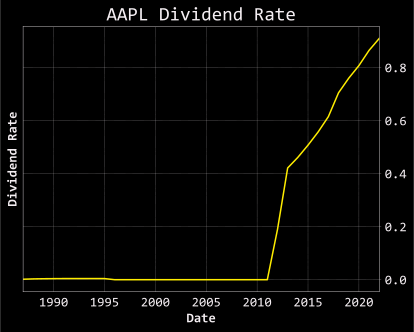

In [5]:
#determine if share value should be in percent (div over $100) or dollars. 

#First get annual dividends
divs_annual = divs.groupby(pd.Grouper(axis=0,freq='Y')).sum()
#check if mean is >100
if((divs_annual['Dividends'].mean())>100):
    factor_percent = True
else:
    factor_percent = False

if(factor_percent):
    div_rate_plot = divs_annual['Dividends'].plot()
    div_rate_plot.set_title(f"{stock} Dividend Percent", loc = 'center')
    div_rate_plot.set_ylabel("Dividend Percent")
else:
    div_rate_plot = divs_annual['Dividends'].plot()
    div_rate_plot.set_title(f"{stock} Dividend Rate", loc = 'center')
    div_rate_plot.set_ylabel("Dividend Rate")

## Earnings Rate
The *earnings rate* is the amount of annual earnings per share, expressed
either in dollars or as a percentage of a $100 par value.

NOTE: computed this one annually not quarterly

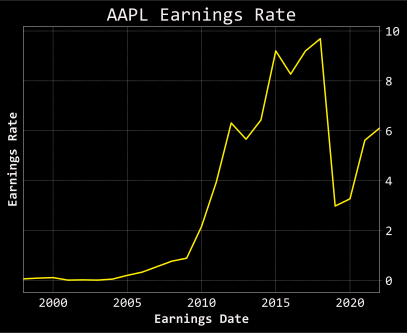

In [9]:
#determine if share value should be in percent (div over $100) or dollars. 

#First get annual dividends
earnings_annual = earnings.groupby(pd.Grouper(key='Earnings Date',axis=0,freq='Y')).sum()
#print("Earnings Annualized\n",earnings_annual)
#check if mean is >100
if((earnings_annual['Reported EPS'].mean())>100):
    factor_percent = True
else:
    factor_percent = False

if(factor_percent):
    earn_rate_plot = earnings_annual['Reported EPS'].plot()
    earn_rate_plot.set_title(f"{stock} Earnings Percent", loc = 'center')
    earn_rate_plot.set_ylabel("Earnings Percent")
else:
    earn_rate_plot = earnings_annual['Reported EPS'].plot()
    earn_rate_plot.set_title(f"{stock} Earnings Rate", loc = 'center')
    earn_rate_plot.set_ylabel("Earnings Rate")

## Dividend Ratio
The *dividend ratio*, dividend return or dividend yield, is the ratio of the
dividend paid to the market price (e.g., a stock paying $6 annually and
selling at 120 has a dividend ratio of 5%).

NOTE: I also computed this one annually not quarterly


Need to figure out how to do search based on Date

Text(0.5, 1.0, 'AAPL Dividend Ratio')

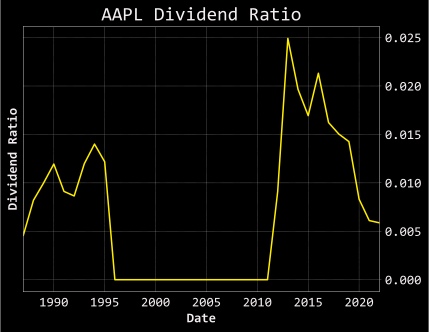

In [13]:
quote_annual = quote.groupby(pd.Grouper(axis=0,freq='Y')).mean()
dividend_ratio = pd.merge(divs_annual,quote_annual,left_index=True,right_index=True,sort=False)
#print(dividend_ratio)

dividend_ratio['Div Ratio'] = dividend_ratio['Dividends']/dividend_ratio['Close']

#print(dividend_ratio)
div_ratio_plot = dividend_ratio['Div Ratio'].plot()
div_ratio_plot.set_ylabel("Dividend Ratio")
div_ratio_plot.set_title(f"{stock} Dividend Ratio", loc = 'center')



## Earnings Ratio
The *earnings ratio*, earnings return or earnings yield, is the ratio of the
annual earnings to the market price (e.g., a stock earning $6 and selling
at 50 shows an earnings yield of 12%).

In [ ]:
#print(earnings_annual)
#quote_annual.tail()
earnings_to_price = pd.merge(earnings_annual,quote_annual,left_on='Earnings Date',right_index=True,sort=False)
print(earnings_to_price)
#earnings_to_price.insert(3,"E")

In [ ]:
div_chart = openbb.stocks.fa.divs_chart("ET")
div_chart